https://data.mos.ru/opendata/3403?isRecommendationData=false&filter=YEAR+ilike+%27%252024%25%27&pageSize=10&pageIndex=0- Результаты ОГЭ

In [17]:
# Импорт стандартных пакетов
import pandas as pd

# Для парсинга веб-страниц
import requests as reqs
import urllib.request
from bs4 import BeautifulSoup
import json
import os
import pprint

# Для выполнения операций с регулярными выражениями
import re

In [22]:
import requests

api_url = "https://apidata.mos.ru/v1/datasets/3403/features?api_key=75a82239-0bc2-4820-b038-39238fbd68c0"

response = requests.get(api_url)

if response.status_code == 200:
    data = response.json()
    # Здесь можно обрабатывать данные в формате JSON
else:
    print("Ошибка при получении данных:", response.status_code)

In [23]:
response

<Response [200]>

In [25]:
json_page = json.loads(response.text)

In [26]:
json_page 

{'features': [{'geometry': None,
   'properties': {'datasetId': 3403,
    'rowId': None,
    'attributes': {'is_deleted': 0,
     'AdmArea': 'Восточный административный округ',
     'District': 'район Богородское',
     'EDU_NAME': 'Государственное бюджетное общеобразовательное учреждение города Москвы «Гимназия № 1797 «Богородская»',
     'OGE_SCORE': 98,
     'YEAR': '2016-2017',
     'global_id': 797361191},
    'releaseNumber': 28,
    'versionNumber': 1},
   'type': 'Feature'},
  {'geometry': None,
   'properties': {'datasetId': 3403,
    'rowId': None,
    'attributes': {'is_deleted': 0,
     'AdmArea': 'Восточный административный округ',
     'District': 'район Богородское',
     'EDU_NAME': 'Государственное бюджетное общеобразовательное учреждение города Москвы «Школа № 390 имени генерала П.И. Батова»',
     'OGE_SCORE': 28,
     'YEAR': '2016-2017',
     'global_id': 797363454},
    'releaseNumber': 28,
    'versionNumber': 1},
   'type': 'Feature'},
  {'geometry': None,
   'p

In [13]:
for x in json_page:
    print(x)

features
type


In [51]:
pprint.pprint(json_page)

{'features': [{'geometry': None,
               'properties': {'attributes': {'AdmArea': 'Восточный '
                                                        'административный '
                                                        'округ',
                                             'District': 'район Богородское',
                                             'EDU_NAME': 'Государственное '
                                                         'бюджетное '
                                                         'общеобразовательное '
                                                         'учреждение города '
                                                         'Москвы «Гимназия № '
                                                         '1797 «Богородская»',
                                             'OGE_SCORE': 98,
                                             'YEAR': '2016-2017',
                                             'global_id': 797361191,
                    

Вытянем 3 показателя - балл огэ, округ и район

 Возьмем данные по Северному административному округу

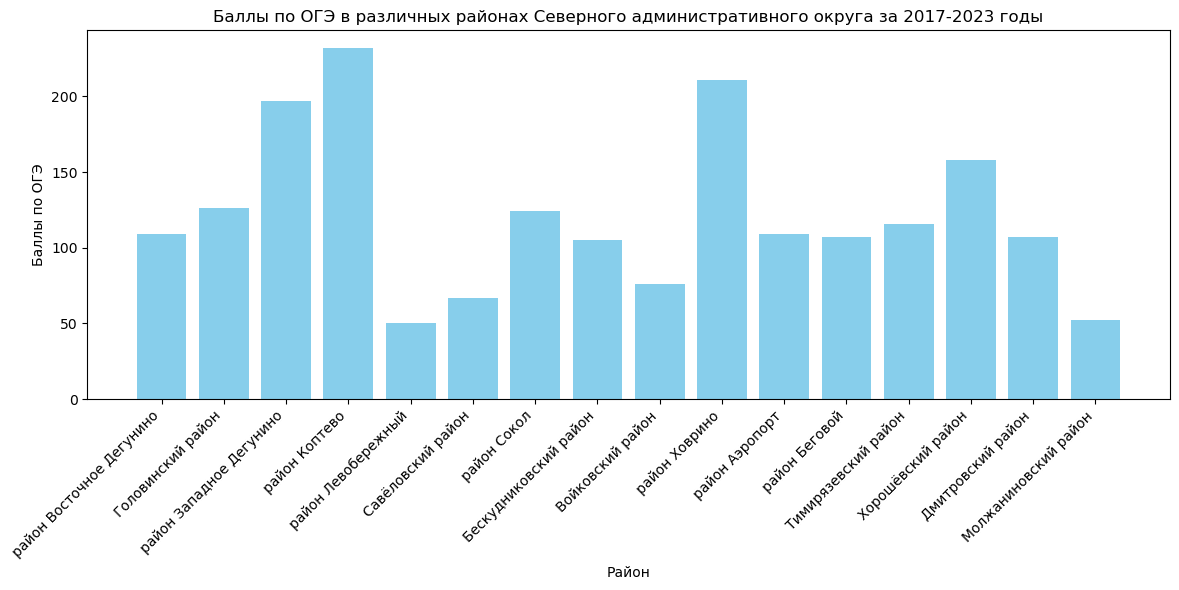

In [69]:
import requests
import matplotlib.pyplot as plt

# URL сайта с данными
url = "https://apidata.mos.ru/v1/datasets/3403/features?api_key=75a82239-0bc2-4820-b038-39238fbd68c0"

# Функция для извлечения данных о баллах ОГЭ и районах для определенного административного округа
def extract_oge_data(url, adm_area):
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        oge_data = []
        for feature in data.get('features', []):
            properties = feature.get('properties', {})
            oge_score = properties.get('attributes', {}).get('OGE_SCORE')
            district = properties.get('attributes', {}).get('District')
            area = properties.get('attributes', {}).get('AdmArea')
            if (oge_score is not None and district is not None and area == adm_area):
                oge_data.append({'oge_score': oge_score, 'district': district})
        return oge_data
    else:
        print("Ошибка при получении данных с сайта.")
        return None

# Получение данных только для Северного административного округа
oge_data_severny = extract_oge_data(url, adm_area='Северный административный округ')

# Формирование данных для визуализации
districts = [entry['district'] for entry in oge_data_severny]
oge_scores = [entry['oge_score'] for entry in oge_data_severny]

# Визуализация данных
plt.figure(figsize=(12, 6))
plt.bar(districts, oge_scores, color='skyblue')
plt.xlabel('Район')
plt.ylabel('Баллы по ОГЭ')
plt.title('Баллы по ОГЭ в различных районах Северного административного округа за 2017-2023 годы')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Мы видим, что наихудший балл его в САО был в районе Левобережный. Наилучшим - Район Коптево.